In [11]:
from pandas import read_csv
import numpy as np
#from keras.saving import load_model
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
itxt="data_demo_2.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
print(datalist[0:4],len(datalist))
datanp=np.zeros((19997,11))
print(datanp.shape,len(datalist))

['1670.05\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.09\t0\n', '1670.06\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.08\t0\n', '1670.07\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.07\t0\n', '1670.08\t0\t0\t0\t0\t68.585\t0\t0\t36.36\t-11.32\t-88.07\t0\n'] 7253
(19997, 11) 7253


In [3]:
count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    #print(datai)
    for j in range(11):
        #print(j)
        datanp[count:count+1,j]=float(datai[j])
    count=count+1
print(datanp[0:3,:],datanp.shape)

[[1670.05     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.09 ]
 [1670.06     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.08 ]
 [1670.07     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.07 ]] (19997, 11)


In [9]:
A=datanp[:,5:6]
print(A.shape)
A_=A[1:]
print(A_.shape)
inputs=np.hstack((datanp[0:19996,1:5],A_))
print(inputs.shape)

(19997, 1)
(19996, 1)
(19996, 5)


In [14]:
tf.random.set_seed(452)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu',input_shape=[5]), 
  tf.keras.layers.Dense(100,activation='relu'), 
  tf.keras.layers.Dense(100,activation='relu'),                            
  tf.keras.layers.Dense(1,activation='linear')])
model.compile(loss = tf.keras.losses.mse,optimizer =tf.keras.optimizers.Adam(lr=0.001),metrics= ['mse'])
#Fit the model
model.fit(inputs, A[:19996],epochs=100)

625/625 [==============================] - 1s 2ms/step - loss: 0.0115 - mse: 0.0115
Epoch 90/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0069 - mse: 0.0069
Epoch 91/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0090 - mse: 0.0090
Epoch 92/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 93/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 94/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 95/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0052 - mse: 0.0052
Epoch 96/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 97/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0108 - mse: 0.0108
Epoch 98/100
625/625 [==============================] - 1s 1ms/step - loss: 0.0066 - mse: 0.0066
Epoch 99/100
625/625 [=====================

Text(0, 0.5, 'val_data')

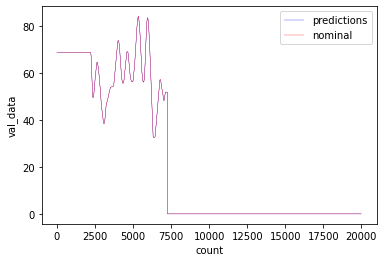

In [16]:
y=model.predict(inputs)
t=np.linspace(0, len(y), num=len(y))
plt.figure()
plt.plot(t,A[:19996], color='blue', marker=' ', linestyle='solid',linewidth=0.3, markersize=5,label="predictions")
plt.plot(t,y, color='red', marker=' ', linestyle='solid',linewidth=0.3, markersize=5, label="nominal")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("val_data")
#pngf="Bijia1.png"
#plt.savefig(pngf, dpi=500)
